In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AvgPool2D, Dropout, Flatten, Dense

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread

2023-12-11 21:47:19.872374: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, Y_train), (X_validate, Y_validate) = mnist.load_data()
X_train = X_train / 255.0
X_validate = X_validate / 255.0

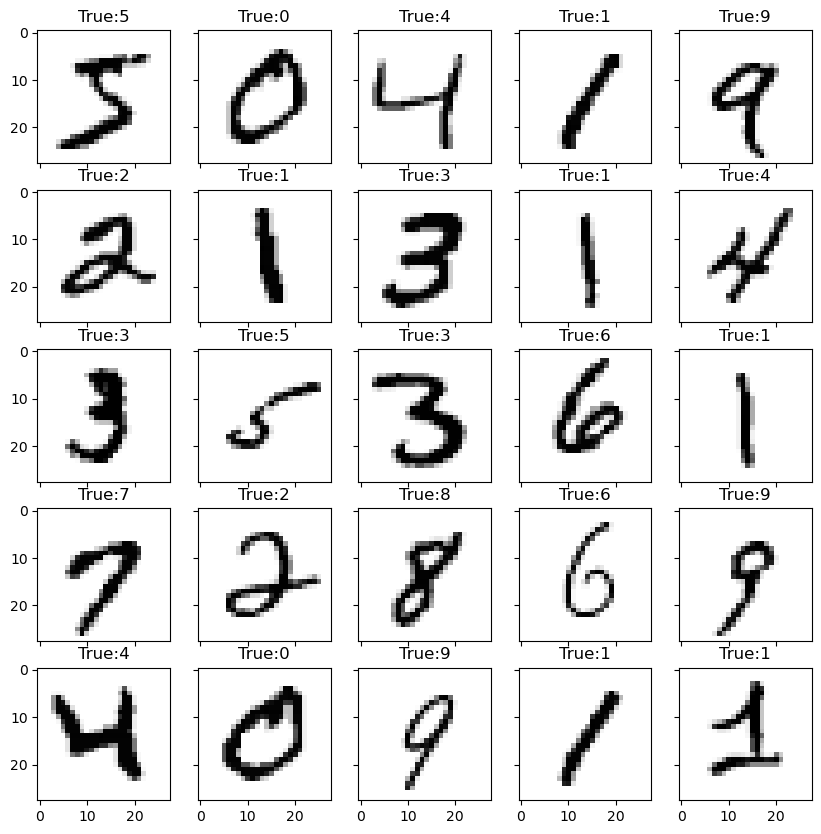

In [3]:
k = 5
fg, ax = plt.subplots(k, k, figsize=(2*k,2*k), sharex=True, sharey=True)
j = 0
for i1 in range(k):
    for i2 in range(k):
        ax[i1,i2].imshow(X_train[j], cmap='Greys')
        ax[i1,i2].set_title(f'True:{Y_train[j]}')
        j += 1

In [4]:
n_train = Y_train.size
Y_train_flat = np.zeros((n_train, 10))
for j in range(n_train):
    Y_train_flat[j, Y_train[j]] = 1.0

In [5]:
n_validate = Y_validate.size
Y_validate_flat = np.zeros((n_validate, 10))
for j in range(n_validate):
    Y_validate_flat[j, Y_validate[j]] = 1.0

In [41]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D())
#model.add(Conv2D(16, kernel_size=(5, 5), activation="relu"))
model.add(Flatten())
model.add(Dense(120, activation="relu"))
model.add(Dropout(0.20))
model.add(Dense(60, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.build(input_shape=(None, 28, 28, 1))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 12, 12, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 8, 8, 32)          12832     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 4, 4, 32)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 512)               0         
                                                                 
 dense_45 (Dense)            (None, 120)             

In [42]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [43]:
model.fit(
    x=X_train, 
    y=Y_train_flat, 
    batch_size=128, 
    epochs=10, 
    validation_data=(X_validate, Y_validate_flat)
)

Epoch 1/10
469/469 [==============================] - 17s 34ms/step - loss: 0.2831 - accuracy: 0.9163 - val_loss: 0.0599 - val_accuracy: 0.9806
Epoch 2/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0782 - accuracy: 0.9763 - val_loss: 0.0481 - val_accuracy: 0.9845
Epoch 3/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0559 - accuracy: 0.9830 - val_loss: 0.0350 - val_accuracy: 0.9868
Epoch 4/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0424 - accuracy: 0.9863 - val_loss: 0.0353 - val_accuracy: 0.9879
Epoch 5/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0350 - accuracy: 0.9896 - val_loss: 0.0288 - val_accuracy: 0.9906
Epoch 6/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0301 - accuracy: 0.9902 - val_loss: 0.0290 - val_accuracy: 0.9903
Epoch 7/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.0301 - val_accuracy:

In [44]:
model.save('mnist4.mdl')

2023-12-11 22:05:40.270178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,120]
	 [[{{node inputs}}]]
2023-12-11 22:05:40.572480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,120]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: mnist4.mdl/assets


INFO:tensorflow:Assets written to: mnist4.mdl/assets


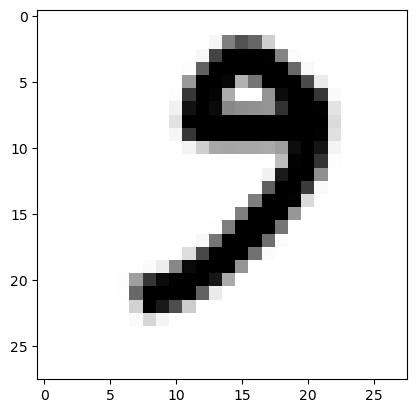

In [45]:
my_num = imread("static/img28.png")
my_num = 1.0 - my_num
plt.imshow(my_num, cmap='Greys')

1/1 [==============================] - 0s 97ms/step


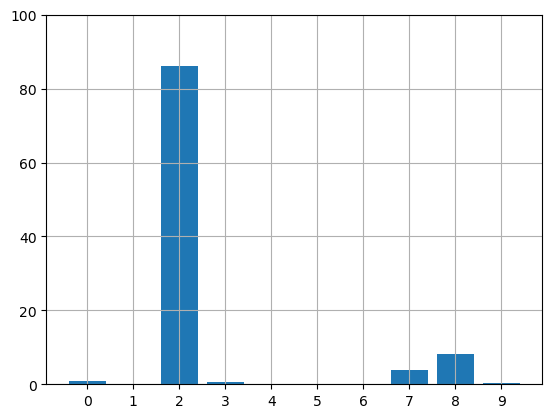

In [46]:
prediction = model.predict(np.reshape(my_num, (1, 28, 28)))
fg, ax = plt.subplots()
ax.bar([f'{j}' for j in range(10)], 100 * prediction.flatten())
ax.set_ylim(0, 100)
ax.grid()